In [12]:
import statistics
import numpy as np
import pandas as pd
import scipy.stats as stats
import scipy
import math
# Otras rutas de Scipy: https://docs.scipy.org/doc/scipy/tutorial/index.html

In [6]:
# Formas de crear nan's. Tienen sutiles diferencias, pero para nosotros da igual
np.nan
math.nan
float('nan')

nan

In [19]:
lista = [5, 8, 9, 7, 3, 1]
lista_nan = [5, 8, np.nan, 7, 3, 1]

arr = np.array(lista)
arr_nan = np.array(lista_nan)
serie = pd.Series(lista)
serie_nan = pd.Series(lista_nan)

todos = {'lista':lista, 'lista_nan':lista_nan, 'arreglo':arr,
         'arreglo_nan':arr_nan, 'serie':serie, 'serie_nan':serie_nan}

In [10]:
for key, val in todos.items():
  print(key)
  print(sum(val)/len(val))
  print('-'*15)

lista
5.5
---------------
lista_nan
nan
---------------
arreglo
5.5
---------------
arreglo_nan
nan
---------------
serie
5.5
---------------
serie_nan
nan
---------------


In [14]:
for key, val in todos.items():
  print(key)
  print(statistics.mean(val))
  print('-'*15)

lista
5.5
---------------
lista_nan
nan
---------------
arreglo
5
---------------
arreglo_nan
nan
---------------
serie
5.5
---------------
serie_nan
nan
---------------


In [13]:
for key, val in todos.items():
  print(key)
  print(np.mean(val))
  print('-'*15)

lista
5.5
---------------
lista_nan
nan
---------------
arreglo
5.5
---------------
arreglo_nan
nan
---------------
serie
5.5
---------------
serie_nan
4.8
---------------


## Mediana

NumPy no nos deja tener nulos al calcular la mediana. Sin embargo, podríamos usar np.nanmedian() para que hiciera como que ese NaN no existe. 

In [20]:
for key, val in todos.items():
  print(key)
  print(np.median(val))
  print('-'*15)

lista
6.0
---------------
lista_nan
nan
---------------
arreglo
6.0
---------------
arreglo_nan
nan
---------------
serie
6.0
---------------
serie_nan
nan
---------------


## Moda

In [30]:
# Lista con una moda
lista_sencilla = [1,2,3,1,6,1,7,1,54]

# Lista con dos modas
lista_doble = [1,2,1,2,1,2,6,2,6,1,98,345]

In [31]:
statistics.mode(lista_doble)

1

In [32]:
stats.mode(lista_sencilla)

ModeResult(mode=array([1]), count=array([4]))

In [33]:
stats.mode(lista_doble)

ModeResult(mode=array([1]), count=array([4]))

En NumPy no existe la moda :(

## Distribuciones

In [54]:
# Similar a la de pandas
stats.describe(lista)

DescribeResult(nobs=6, minmax=(1, 9), mean=5.5, variance=9.5, skewness=-0.33670357262095774, kurtosis=-1.2890858725761773)

In [55]:
# Parar hacer una distribución nomal, creo un objeto como este
# Le pueo pasar la media y la desviación estándar
# Por defecto la media es 0 y la desv. estándar es 1
normal = stats.norm(4,5)

In [89]:
# .expect() es el valor esperado, que es la media
normal.expect()

4.000000000000023

In [57]:
# Me dice el punto de intervalo de confianza, en el cual caen el 95% de mis datos
normal.interval(0.95)

(-5.799819922700269, 13.79981992270027)

In [58]:
# Para sacar un intervalo específico 
# Otro intervalo de confianza con proba de 95% es (-infinito, 1.6448536269514729)
normal.isf(0.05)

12.224268134757365

In [59]:
# Función de densidad (probability density function = pdf)
# NO es la probabilidad de que tenga 10. Creo que es el punto más alto de la gráfica de la distribución normal. 
normal.pdf(10)

0.0388372109966426

In [60]:
# Esta sí es la probabilidad de obtener un número menor o igual a 10
normal.cdf(10)

0.8849303297782918

Grafiquemos

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
normal_std = stats.norm()

In [65]:
x = np.arange(-3, 3.01, 0.1)
x

array([-3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
       -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
       -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01,  2.66453526e-15,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01,
        1.00000000e+00,  1.10000000e+00,  1.20000000e+00,  1.30000000e+00,
        1.40000000e+00,  1.50000000e+00,  1.60000000e+00,  1.70000000e+00,
        1.80000000e+00,  1.90000000e+00,  2.00000000e+00,  2.10000000e+00,
        2.20000000e+00,  

In [69]:
# LE aplico esta función a cada punto, es decir, es la altura de cada punto. 
y = normal_std.pdf(x)
y

array([0.00443185, 0.00595253, 0.00791545, 0.01042093, 0.01358297,
       0.0175283 , 0.02239453, 0.02832704, 0.03547459, 0.0439836 ,
       0.05399097, 0.06561581, 0.07895016, 0.09404908, 0.11092083,
       0.1295176 , 0.14972747, 0.17136859, 0.19418605, 0.21785218,
       0.24197072, 0.26608525, 0.28969155, 0.31225393, 0.3332246 ,
       0.35206533, 0.36827014, 0.38138782, 0.39104269, 0.39695255,
       0.39894228, 0.39695255, 0.39104269, 0.38138782, 0.36827014,
       0.35206533, 0.3332246 , 0.31225393, 0.28969155, 0.26608525,
       0.24197072, 0.21785218, 0.19418605, 0.17136859, 0.14972747,
       0.1295176 , 0.11092083, 0.09404908, 0.07895016, 0.06561581,
       0.05399097, 0.0439836 , 0.03547459, 0.02832704, 0.02239453,
       0.0175283 , 0.01358297, 0.01042093, 0.00791545, 0.00595253,
       0.00443185])

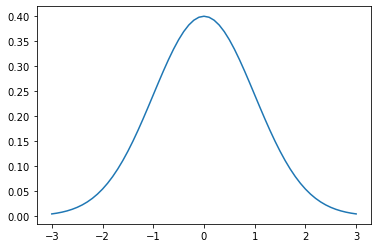

In [72]:
plt.plot(x, y);

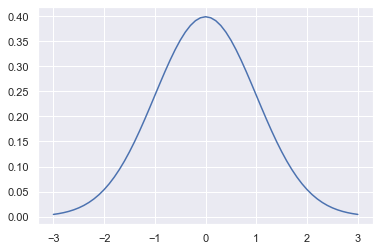

In [82]:
sns.set_theme()
sns.lineplot(x=x, y=y);

In [87]:
# Puedo pedir una muestra
normal_std.rvs(100, random_state=42) # El tamaño de mi muestra

# Así simulo más o menos, sacar datos aleatorios de la distribución

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
       -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
       -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
        0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
       -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
        0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
        0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
       -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
        1.35624003, -0.07201012,  1.0035329 ,  0.36163603, -0.64

In [90]:
# 500 clientes y cada uno tiene una probabilidad de comprar de 1/3
binomial = stats.binom(500, 1/3)

In [91]:
# En promedio, cuántos clientes me comprarán (en otras palabras, cuál es 
# el valor esperado de que me compren)
binomial.expect()

166.6666666666417

In [92]:
# Cuántos clientes me comprarán con una probabilidad del 95%
binomial.interval(0.95)

(146.0, 187.0)

In [94]:
# Probability mass function
# Qué tan probable es que me compren exactamente 166 personas
binomial.pmf(166)

0.03778719260640801

3% de prob de que me compren exactamente 166 personas

In [96]:
# Probabilidad acumulada
binomial.cdf(166)

0.49579770091446485

In [98]:
# Sale igual qeu el anterior porque no me pueden comprar 166.99 personas, solo números enteros
binomial.cdf(166.99999)

0.49579770091446485

In [102]:
# Vamos a ver el rango de personas que me pueden comprar y plotearlo
x = np.arange(0, 501)
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

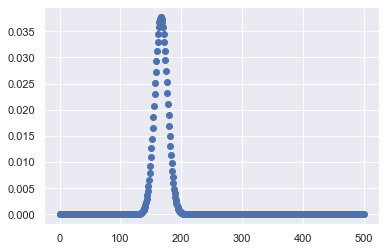

In [104]:
plt.scatter(x, binomial.pmf(x));

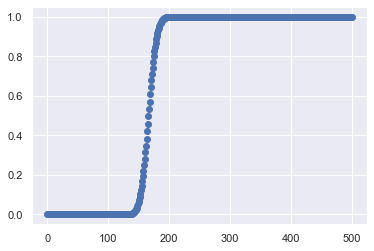

In [106]:
# Esa gráfica es así, por el pico anterior. De pronto sube mucho la probabilidad de que un valor caiga ahí
plt.scatter(x, binomial.cdf(x));